In [2]:
# importing pandas and opening the exxcel file. 
# The sheet_name argument is used to select particular sheets in the file.
import pandas as pd
#reading the file
df = pd.read_excel(r"C:\Users\USER\Desktop\work\shark.xlsx",sheet_name = "Shark Tank US dataset")
# creating the dataframe called Sharkt.
Sharkt = pd.DataFrame(df)


In [3]:
# Getting basic info on the columns, I dod this to see what columns exist and if they are in the right data type.
Sharkt.info()
# to get a view of the first few rows of the dataframe
Sharkt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Season Number                       1267 non-null   int64         
 1   Season Start                        1267 non-null   datetime64[ns]
 2   Season End                          1267 non-null   datetime64[ns]
 3   Episode Number                      1267 non-null   int64         
 4   Pitch Number                        1267 non-null   int64         
 5   Original Air Date                   1267 non-null   datetime64[ns]
 6   Startup Name                        1267 non-null   object        
 7   Industry                            1267 non-null   object        
 8   Pitchers Gender                     1267 non-null   object        
 9   Pitchers City                       500 non-null    object        
 10  Pitchers State          

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Pitchers City,...,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,Atlanta,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,Somerset,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,Cary,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,Tampa,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,St. Paul,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0


In [10]:
# Now we check for missing values
print(Sharkt.isna().sum())



Season Number                            0
Season Start                             0
Season End                               0
Episode Number                           0
Pitch Number                             0
Original Air Date                        0
Startup Name                             0
Industry                                 0
Pitchers Gender                          0
Company Website                        754
Multiple Entrepreneurs                 427
US Viewership                            0
Original Ask Amount                      0
Original Offered Equity                  0
Valuation Requested                      0
Got Deal                                 0
Total Deal Amount                      507
Total Deal Equity                      507
Deal Valuation                         507
Number of sharks in deal               507
Investment Amount Per Shark            507
Equity Per Shark                       507
Royalty Deal                          1193
Loan       

In [14]:
 #the pitchers city, pitchers state, Guest name and pitchers average age columns have more than half thier values missing
# and are independent so they can't be deduced.
Sharkt.drop(['Pitchers City','Pitchers State','Pitchers Average Age','Guest Name'], axis = 1)

KeyError: "['Pitchers City', 'Pitchers State', 'Pitchers Average Age', 'Guest Name'] not found in axis"

In [ ]:
# Changing values in got deal column from 0 and 1
Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(0,"NO")

Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(1,"YES")



In [ ]:
# In the dataset when a company has no website it is left blank so we fill blanks with no website
Sharkt["Company Website"] = Sharkt["Company Website"].fillna("No website")




In [6]:
# In the dataset when a company was not invested in it is left blank so we fill blanks with did not invest
Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]] = Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]].fillna("Did not invest")
Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]] = Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]].fillna("Did not Invest")




In [7]:
# Changing values from 0 to 1 with 1 meaning its a royalty deal and 0 meaniing advisory deal
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].replace(1,"Royalty deal")
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].fillna("Advisory deal")



In [8]:
# If no loan or given was taken it is left empty

Sharkt["Loan"] = Sharkt["Loan"].fillna("No loan")





In [9]:
# Changing the values for presence of sharks from 0 and 1 to present and not
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].fillna("unknown")

Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(0,"Not present")
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(1,"Present")


In [10]:
from IPython.display import display
display(Sharkt)


,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Company Website,...,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,http://www.avatheelephant.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,http://whybake.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,http://www.wispots.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,http://collegehunkshaulingjunk.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,NaN,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,14,2022-09-23,2023-05-19,21,1270,2023-05-05,NoshiFood,Food and Beverage,Male,noshiforkids.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,Present,unknown,unknown,unknown,unknown
1263,14,2022-09-23,2023-05-19,22,1271,2023-05-19,Tucky,Fashion/Beauty,Female,shoptucky.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,unknown,unknown,unknown,Present,unknown
1264,14,2022-09-23,2023-05-19,22,1272,2023-05-19,InfluencersInTheWild,Lifestyle/Home,Male,influencersinthewild.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,unknown,unknown,unknown,unknown,unknown
1265,14,2022-09-23,2023-05-19,22,1273,2023-05-19,Eyewris,Lifestyle/Home,Male,eyewris.com,...,25000.0,4.0,Did not Invest,Did not Invest,Present,Present,Present,unknown,Present,Present


In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Answering the questions
# Average no of episodes per season.
print(Sharkt["Season Number"].value_counts().mean())

90.5


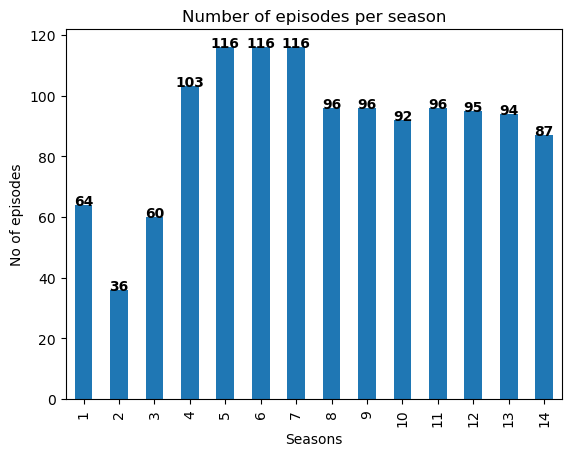

In [127]:
# How many episodes per season
import matplotlib.pyplot as plt
Sharkt["Season Number"].value_counts()[Sharkt["Season Number"].unique()].plot(kind ='bar',title = "Number of episodes per season",xlabel = "Seasons",ylabel = "No of episodes")
Datalabels_ep_per_season = list(Sharkt["Season Number"].value_counts()[Sharkt["Season Number"].unique()])
for season,value in enumerate(Datalabels_ep_per_season):
    plt.text(season,value,str(value),ha = "center", fontsize = 10, fontweight = 'bold')
# No of episodes
# No of seasons

In [119]:
print(Datalabels_ep_per_season)

[116, 116, 116, 103, 96, 96, 96, 95, 94, 92, 87, 64, 60, 36]


In [160]:
from datetime import datetime
d = Sharkt["Original Air Date"].dt.strftime('%b')

In [161]:
Sharkt['Release month'] = d

In [167]:
Sharkt.groupby('Season Number')['Release month','Episode Number'].nunique()

C:\Users\USER\AppData\Local\Temp\ipykernel_8052\2964232649.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Sharkt.groupby('Season Number')['Release month','Episode Number'].nunique()


,Release month,Episode Number
Season Number,,
1,5,14
2,3,9
3,5,15
4,9,26
5,9,29
6,9,29
7,9,29
8,9,24
9,5,24
